https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

In [2]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 3.3 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [4]:
df_train = pd.read_csv('/Users/sdeshpande/Desktop/bioinformatices/drugsCom_raw/drugsComTrain_raw.tsv',sep=None)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [6]:
df_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [7]:
del df_train['Unnamed: 0']
del df_train['date']

In [8]:
print("number of drugs:", len(df_train['drugName'].unique()))
print("number of conditions:", len(df_train['condition'].unique()))

number of drugs: 3436
number of conditions: 885


In [10]:
drug_per_condition = df_train.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
drug_per_condition[:30]

condition
Not Listed / Othe                             214
Pain                                          200
Birth Control                                 172
High Blood Pressure                           140
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Bipolar Disorde                                80
Osteoarthritis                                 80
Insomnia                                       78
Anxiety                                        78
Abnormal Uterine Bleeding                      74
Migraine                                       59
Psoriasis                                      58
Endometriosis                                  57
3</span> users found this comment helpful.     57
ADHD                                           55
Asthma, Maintenance                     

In [11]:
# replace wrong name in condition column with NaN
df_train.loc[df_train['condition'].str.contains('</span>',case=False, na=False), 'condition'] = 'NAN'
df_train['condition'].replace('NAN', np.NaN, inplace=True)
df_train['condition'].replace('Not Listed / Othe', np.NaN, inplace=True)

In [12]:
#create a dictionary with drugname:condition to fill NaN
dictionary=df_train.set_index('drugName')['condition'].to_dict()
len(dictionary)

3436

In [13]:
#fill NaN value with correct condition names using created dictionary
df_train.condition.fillna(df_train.drugName.map(dictionary), inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     161297 non-null  object 
 1   condition    161197 non-null  object 
 2   review       161297 non-null  object 
 3   rating       161297 non-null  float64
 4   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 6.2+ MB


In [14]:
#drop rows with still missing values in condition (100 rows = 0.0006% of total data)
df_train.dropna(inplace=True)

In [16]:
drug_per_condition = df_train.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
drug_per_condition[:30]

condition
Pain                         200
Birth Control                172
High Blood Pressure          140
Acne                         117
Depression                   105
Rheumatoid Arthritis          98
Diabetes, Type 2              89
Allergic Rhinitis             88
Bipolar Disorde               80
Osteoarthritis                80
Anxiety                       78
Insomnia                      78
Abnormal Uterine Bleeding     74
Migraine                      59
Psoriasis                     58
Endometriosis                 57
ADHD                          55
Asthma, Maintenance           54
Chronic Pain                  53
Migraine Prevention           50
Irritable Bowel Syndrome      49
Major Depressive Disorde      49
Urinary Tract Infection       47
ibromyalgia                   45
Postmenopausal Symptoms       44
Bronchitis                    44
GERD                          43
HIV Infection                 43
Bacterial Infection           43
Sinusitis                     42


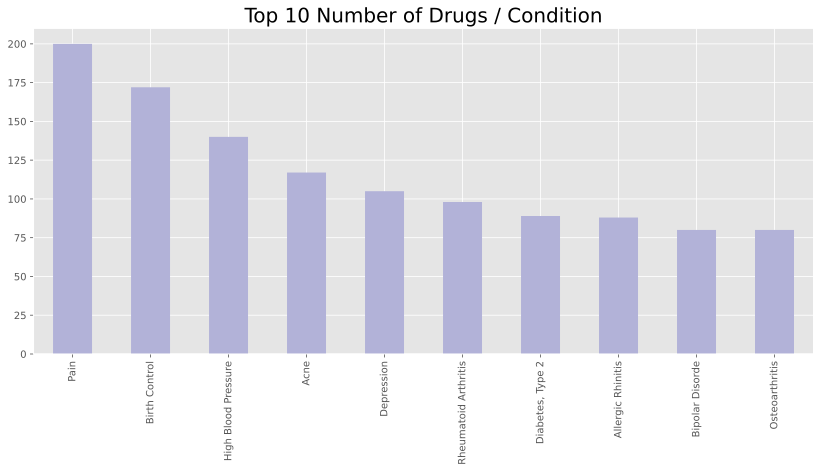

In [18]:
drug_per_condition[:10].plot(kind="bar", figsize = (14,6), fontsize = 10, color="#B2B2D8")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top 10 Number of Drugs / Condition", fontsize = 20)
plt.savefig('top10_condition.svg')

In [19]:
#selecte conditions with less than 11 drugs
condition_1=drug_per_condition[drug_per_condition<=10].keys()
condition_1

Index(['Social Anxiety Disorde', 'Constipation, Acute',
       'Postpartum Depression', 'Benign Essential Trem',
       'Primary Immunodeficiency Syndrome', 'Hypertriglyceridemia', 'Uveitis',
       'Malaria', 'Autism', 'Juvenile Rheumatoid Arthritis',
       ...
       'Scleroderma', 'Klinefelter Syndrome', 'Cogan's Syndrome',
       'Coccidioidomycosis', 'Cluster-Tic Syndrome', 'Legionella Pneumonia',
       'Leukocytoclastic Vasculitis', 'Lewy Body Dementia',
       'Ventricular Arrhythmia',
       'Postoperative Increased Intraocular Pressure'],
      dtype='object', name='condition', length=625)

In [20]:
#delete condition with less than 11 drugs
df_train1=df_train[~df_train['condition'].isin(condition_1)]
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148387 entries, 1 to 161296
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     148387 non-null  object 
 1   condition    148387 non-null  object 
 2   review       148387 non-null  object 
 3   rating       148387 non-null  float64
 4   usefulCount  148387 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 6.8+ MB


In [21]:
import re # Regular expression library
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sdeshpande/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sdeshpande/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sdeshpande/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
import spacy
nlp = spacy.load("en_core_web_sm")

In [23]:
#remove words needs for sentiment analysis from stopwords
n = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in n:
    stop.remove(i)

In [ ]:
#add more words to stopwords
a = ['mg', 'week', 'month', 'day', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 
     'august', 'september','october','november','december', 'iv','oral','pound', 'lb', 'month', 'day','night']
for j in a:
    stop.add(j)

In [24]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric=lambda x: re.sub('[^a-zA-Z]', ' ', x)
punc_lower=lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
split=lambda x: x.split()

df_train1['review'] = df_train1.review.map(alphanumeric).map(punc_lower).map(split)

In [25]:
#remove stopwords
df_train1['review_clean']=df_train1['review'].apply(lambda x: [item for item in x if item not in stop])

In [26]:
#lemmatizing
df_train1['review_lemm']=df_train1['review_clean'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [27]:
del df_train1['review']
del df_train1['review_clean']

In [28]:
df_train1['review']=df_train1['review_lemm'].apply(lambda x:' '.join(x))

In [29]:
del df_train1['review_lemm']
df_train1

,drugName,condition,rating,usefulCount,review
1,Guanfacine,ADHD,8.0,192,son halfway fourth week intuniv became concern...
2,Lybrel,Birth Control,5.0,17,used take another oral contraceptive pill cycl...
3,Ortho Evra,Birth Control,8.0,10,first time using form birth control glad went ...
5,Cialis,Benign Prostatic Hyperplasia,2.0,43,nd day mg started work rock hard erection howe...
6,Levonorgestrel,Emergency Contraception,1.0,5,pulled cummed bit took plan b hour later took ...
...,...,...,...,...,...
161291,Junel 1.5 / 30,Birth Control,6.0,0,would second month junel birth control year ch...
161293,Metoclopramide,Nausea/Vomiting,1.0,34,given iv surgey immediately became anxious cou...
161294,Orencia,Rheumatoid Arthritis,2.0,35,limited improvement month developed bad rash m...
161295,Thyroid desiccated,Underactive Thyroid,10.0,79,thyroid medication year spent first synthroid ...


In [30]:
#save cleaned dataframe to csv file for later use
export_csv = df_train1.to_csv(r'/Users/sdeshpande/Desktop/bioinformatices/drugsCom_raw/df_train.csv', index = None, header=True)

In [31]:
# follow the same cleaning steps for test data
df_test = pd.read_csv('/Users/sdeshpande/Desktop/bioinformatices/drugsCom_raw/drugsComTest_raw.tsv',sep=None)

In [32]:
del df_test['Unnamed: 0']
del df_test['date']

In [33]:
print("number of drugs:", len(df_test['drugName'].unique()))
print("number of conditions:", len(df_test['condition'].unique()))

number of drugs: 2637
number of conditions: 709


In [34]:
#delete condition with less than 11 drugs
df_test1=df_test[~df_test['condition'].isin(condition_1)]
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49470 entries, 0 to 53765
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   drugName     49470 non-null  object 
 1   condition    49175 non-null  object 
 2   review       49470 non-null  object 
 3   rating       49470 non-null  float64
 4   usefulCount  49470 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


In [35]:
df_test1.dropna(inplace=True)

In [36]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric=lambda x: re.sub('[^a-zA-Z]', ' ', x)
punc_lower=lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
split=lambda x: x.split()

df_test1['review'] = df_test1.review.map(alphanumeric).map(punc_lower).map(split)

In [37]:
#remove stopwords
df_test1['review_clean']=df_test1['review'].apply(lambda x: [item for item in x if item not in stop])

In [38]:
#lemmatizing
df_test1['review_lemm']=df_test1['review_clean'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [39]:
del df_test1['review']
del df_test1['review_clean']

In [40]:
df_test1['review']=df_test1['review_lemm'].apply(lambda x:' '.join(x))

In [41]:
del df_test1['review_lemm']
df_test1

,drugName,condition,rating,usefulCount,review
0,Mirtazapine,Depression,10.0,22,tried antidepressant year citalopram fluoxetin...
1,Mesalamine,"Crohn's Disease, Maintenance",8.0,17,son crohn disease done well asacol no complain...
2,Bactrim,Urinary Tract Infection,9.0,3,quick reduction symptom
3,Contrave,Weight Loss,9.0,35,contrave combine drug used alcohol smoking opi...
4,Cyclafem 1 / 35,Birth Control,9.0,4,birth control one cycle reading review type si...
...,...,...,...,...,...
53760,Apri,Birth Control,9.0,18,started taking apri month ago breats got notic...
53762,Escitalopram,Anxiety,9.0,11,taking lexapro escitaploprgram since february ...
53763,Levonorgestrel,Birth Control,8.0,7,married year old no kid taking pill hassle dec...
53764,Tapentadol,Pain,1.0,20,prescribed nucynta severe neck shoulder pain t...


In [42]:
#save cleaned test data to csv file for later use
export_csv = df_test1.to_csv(r'/Users/sdeshpande/Desktop/bioinformatices/drugsCom_raw/df_test.csv', index = None, header=True)

# Topic_modeling-CV_bigram-LDA

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models, similarities, matutils
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df_train_s = pd.read_csv('/Users/sdeshpande/Desktop/bioinformatices/drugsCom_raw/df_train.csv')

In [ ]:
#drop Nan value
df_train_s.dropna(inplace=True)
df_train_s.reset_index(inplace=True)

In [ ]:
df_train_s['condition']

In [ ]:
condition_list=df_train_s['condition'].tolist()

In [ ]:
corpus_train=df_train_s.review

In [ ]:
#custom stopwords
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
n = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't",
     "mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in n:
    stop.remove(i)

a = ['mg', 'week', 'month', 'day', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 
     'august', 'september','october','november','december', 'iv','oral','pound',]
for j in a:
    stop.add(j)

In [ ]:
# Create a CountVectorizer for parsing/counting words
cv = CountVectorizer(ngram_range=(2, 2), min_df=10, max_df=0.8)

cv.fit(corpus_train)


In [ ]:
doc_word = cv.transform(corpus_train).transpose()

In [ ]:
pd.DataFrame(doc_word.toarray(), cv.get_feature_names()).head()

In [ ]:
corpus = matutils.Sparse2Corpus(doc_word)

In [ ]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
len(id2word)

In [ ]:
lda = models.LdaModel(corpus=corpus, num_topics=4, id2word=id2word, passes=10)
lda.print_topics()
lda_corpus = lda[corpus]
lda_corpus

In [ ]:
lda_docs = [doc for doc in lda_corpus]
lda_docs[0:5]

In [ ]:
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(10,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

plt.savefig('/Users/sdeshpande/Desktop/bioinformatices/drugsCom_raw/wc_bigram_lda-2.svg')

In [ ]:
def dominant_topic(ldamodel, corpus, texts):
     #Function to find the dominant topic in each review
     sent_topics_df = pd.DataFrame() 
     # Get main topic in each review
     for i, row in enumerate(ldamodel[corpus]):
         row = sorted(row, key=lambda x: (x[1]), reverse=True)
         # Get the Dominant topic, Perc Contribution and Keywords for each review
         for j, (topic_num, prop_topic) in enumerate(row):
             if j == 0:  # => dominant topic
                 wp = ldamodel.show_topic(topic_num,topn=4)
                 topic_keywords = ", ".join([word for word, prop in wp])
                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
             else:
                 break
     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
     contents = pd.Series(texts)
     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
     return(sent_topics_df)

df_dominant_topic = dominant_topic(ldamodel=lda, corpus=corpus, texts=df_train_s['review']) 
df_dominant_topic.head()

In [ ]:
#export topic keywords to csv file for later use
export_csv = df_dominant_topic.to_csv(r'/Users/sdeshpande/Desktop/bioinformatices/drugsCom_raw/df_dominant_topic.csv', index = None, header=True)

# Get top 10 dominant topics

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [ ]:
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, make_scorer
from sklearn.datasets import fetch_20newsgroups
import gensim

In [ ]:
df_train = pd.read_csv('/Users/sdeshpande/Desktop/bioinformatices/drugsCom_raw/df_train.csv')
df_train.dropna()

In [ ]:
df_topic = pd.read_csv('/Users/sdeshpande/Desktop/bioinformatices/drugsCom_raw/df_dominant_topic.csv')

In [ ]:
df = pd.concat([df_train, df_topic], axis=1, join='inner')

In [ ]:
del df['review']

In [ ]:
drug_per_condition = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
drug_per_condition[:10]

In [ ]:
condition_1=drug_per_condition[:10].keys()
condition_1

In [ ]:
#selecting only top 10 conditions
df_top_10=df[df['condition'].isin(condition_1)]
df_top_10.head()

In [ ]:
top_10=df_top_10.groupby(['condition']).Dominant_Topic.value_counts(normalize=True)

In [ ]:
top_10

# NLP-supervised algorithm

In [ ]:
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, make_scorer
from sklearn.datasets import fetch_20newsgroups
import gensim

In [ ]:
df_train = pd.read_csv('/Users/sdeshpande/Desktop/bioinformatices/drugsCom_raw/df_train.csv')
df_test = pd.read_csv('/Users/sdeshpande/Desktop/bioinformatices/drugsCom_raw/df_test.csv')

In [ ]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [ ]:
from wordcloud import WordCloud

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(10,8), 
                   title = None, title_size=40, image_color=False):

    wordcloud = WordCloud(background_color='white',
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
        
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [ ]:
top_words=df_train.review.value_counts(normalize=True)[:40].keys()

In [ ]:
plot_wordcloud(top_words)
plt.savefig('/Users/jsong/Documents/durg-recommendation/fig/wordcloud.svg')

In [ ]:
# Remove 4-7 star reviews
df_train2 = df_train.drop(df_train[(df_train['rating'] > 4.0) & (df_train['rating'] < 6.0)].index)

# Set 8-10 star reviews to positive(1), the rest to negative(0)
df_train2['sentiment'] = np.where(df_train2['rating'] >= 7, '1', '0')

df_train2

In [ ]:
# Remove 4-7 star reviews
df_test2 = df_test.drop(df_test[(df_test['rating'] > 4.0) & (df_test['rating'] < 6.0)].index)

# Set 8-10 star reviews to positive(1), the rest to negative(0)
df_test2['sentiment'] = np.where(df_test2['rating'] >= 7, '1', '0')

In [ ]:
# Note that the dataset has mostly positive reviews
df_train2.sentiment.value_counts(normalize=True)

In [ ]:
export_csv = df_train2.to_csv(r'/Users/sdeshpande/Desktop/bioinformatices/drugsCom_raw/df_train_sentiment.csv', index = None, header=True)
export_csv = df_test2.to_csv(r'/Users/sdeshpande/Desktop/bioinformatices/drugsCom_raw/df_test_sentiment.csv', index = None, header=True)

In [ ]:
X_train=df_train2.review
y_train=df_train2.sentiment
X_test=df_test2.review
y_test=df_test2.sentiment

In [ ]:
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
n = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't",
     "mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in n:
    stop.remove(i)

a = ['mg', 'week', 'month', 'day', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 
     'august', 'september','october','november','december', 'iv','oral','pound',]
for j in a:
    stop.add(j)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words=stop, ngram_range=(1, 1), min_df=10, max_df=0.7)

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()


In [ ]:
# The second document-term matrix has both unigrams and bigrams, and indicators instead of counts
cv2 = CountVectorizer(stop_words=stop, ngram_range=(1, 2), min_df=10, max_df=0.7)

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [ ]:
# Train the second model
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

In [ ]:
def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

In [ ]:
cm1=conf_matrix(y_test, y_pred_cv1)
plt.savefig('/Users/jsong/Documents/durg-recommendation/fig/cm1_lr1.svg')

In [ ]:
cm2=conf_matrix(y_test, y_pred_cv2)
plt.savefig('/Users/jsong/Documents/durg-recommendation/fig/cm2_lr2.svg')

In [ ]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1', 'LogReg2']
results

In [ ]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [ ]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv2, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv2)

In [ ]:
# Here's the heat map for the first Naive Bayes model
cm3 = conf_matrix(y_test, y_pred_cv1_nb)
plt.savefig('/Users/jsong/Documents/durg-recommendation/fig/cm3_nb1.svg')

In [ ]:
# Here's the heat map for the second Naive Bayes model
cm4 = conf_matrix(y_test, y_pred_cv2_nb)
# plt.savefig('/Users/jsong/Documents/durg-recommendation/fig/cm4_nb2.svg')


In [ ]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(zip(cm3, cm4)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['NB1', 'NB2']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

# use tf-idf instead of count vectorizer

In [ ]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words=stop, ngram_range=(1, 1), min_df=10, max_df=0.7)
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

In [ ]:
tfidf2 = TfidfVectorizer(stop_words=stop, ngram_range=(1, 2), min_df=10, max_df=0.7)
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

In [ ]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm5 = conf_matrix(y_test, y_pred_tfidf1_lr)
plt.savefig('/Users/jsong/Documents/durg-recommendation/fig/cm5_tf_idf_lr1.svg')

In [ ]:
# Fit the second logistic regression on the TF-IDF data
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)
cm6 = conf_matrix(y_test, y_pred_tfidf2_lr)
plt.savefig('/Users/jsong/Documents/durg-recommendation/fig/cm6_tf_idf_lr2.svg')

In [ ]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)
cm8 = conf_matrix(y_test, y_pred_tfidf1_nb)
plt.savefig('/Users/jsong/Documents/durg-recommendation/fig/cm8_tf_idf_nb1.svg')

In [ ]:
# Fit the second Naive Bayes model on the TF-IDF data
bnb.fit(X_train_tfidf2.toarray(), y_train)
y_pred_tfidf2_nb = bnb.predict(X_test_tfidf2)
cm9 = conf_matrix(y_test, y_pred_tfidf2_nb)
plt.savefig('/Users/jsong/Documents/durg-recommendation/fig/cm9_tf_idf_nb2.svg')

In [ ]:
# Compile all of the error metrics into a dataframe for comparison
results_tf = pd.DataFrame(list(zip(cm5, cm6, cm8, cm9)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR1-TFIDF', 'LR2-TFIDF', 'NB1-TFIDF', 'NB2-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results